# California Housing Price Prediction


Business Objective: To build a model of Housing price to predict median House value in California

In [1]:
#Import the required libraries 
# PANDAS : Derived from the PANel DAta 
# 1. Extensively used in data manupilation and data analysis
# 2. Used for convrting .CSV file data intodataframe
import pandas as pd

In [2]:
# NUMPY : NUMerical PYthon
# 1. Useful for Mathematical operations
# 2. used for data storing in arrays
import numpy as np

In [3]:
# matplotlib : Plotting Library
# 1. For creating interactive visualisation
# 2. Generally consisting of Bar plots, Pie charts, Lines, Scattter plots.
import matplotlib.pyplot as plt

In [4]:
# SAEBORN : Usefu for variery of visualization patterns, Histogram, Boxplots
import seaborn as sns

# 1. load the data

In [5]:
# Read the data from excel file with the format of .xlxs  
house_data = pd.read_excel('F:/1. PGP-AI&ML/1. Proj.1. Housing price/housing.xlsx')

In [6]:
# See the data in table format
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [7]:
# See the data of first 5 rows of the data in the table
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
# See the data of last 5 rows of the data in the table
house_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [9]:
#Shape , it is a tuple that gives dimensions of the array. 
house_data.shape

(20640, 10)

In [24]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null int64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [25]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,1.464729,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,0.854226,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,1.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,2.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


the feature of "Ocean proximity" is an Object with Categorical values.

# 2. HANDLING MISSING VALUES

#Checking for the NULL values if any in the variables
# if found null values,that should be filled with mean /mode Or Data Audit should be made (Comprehensive first look at the random data for SD, VARIATION, MEAN , MEDIAN...etc)

In [26]:
house_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#there are 20640 instances and total bedrooms 207 values are missed

# mean value helps in filing the missing values in the data since the missiong value is very less in qty compre to the total aqty of data in the column.

In [29]:
# mean value replacment for null value in the dataset
house_data['total_bedrooms'] = house_data['total_bedrooms'].fillna(house_data['total_bedrooms'].mode()[0])
# for discete values , mode() is used 

In [30]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,342200


In [31]:
house_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [32]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null int64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [33]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,1.464729,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,0.854226,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,1.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,2.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


# Max median_income is 15.000 and min is 0.4999

# 3 Encode Categorical Values

In [34]:
house_data['ocean_proximity'].value_counts()

1    9136
2    6551
3    2658
0    2290
4       5
Name: ocean_proximity, dtype: int64

In [35]:
house_data['ocean_proximity'] = pd.factorize(house_data.ocean_proximity)[0]

In [36]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,342200


In [37]:
house_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,2,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,2,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,2,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,2,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,2,89400


# 4. Split the dataset

In [38]:
house_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [39]:
# Extract input(X) and Output(Y) data from the dataset
X = house_data.loc[:,['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]

In [40]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603
20636,-121.21,39.49,18,697,150.0,356,114,2.5568
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672


In [41]:
X.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [42]:
type(X)

pandas.core.frame.DataFrame

In [43]:
Y = house_data.loc[:,['median_house_value']]

In [44]:
Y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

<IPython.core.display.Javascript object>

In [46]:
X_train.shape

(16512, 8)

In [47]:
X_test.shape

(4128, 8)

In [48]:
Y_train.shape

(16512, 1)

In [49]:
Y_test.shape

(4128, 1)

# 5 STANDARDIZE DATA 

In [50]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,342200


In [51]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null int64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [52]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,1.464729,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,0.854226,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,1.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,2.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A49F6C8E88>,
      dtype=object)

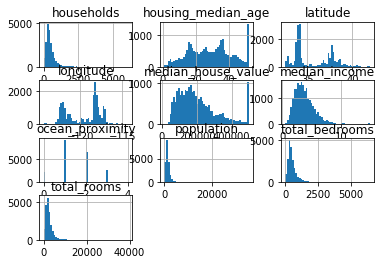

In [53]:
house_data.hist(bins=50)

# bins =50 helps bringing the datasets together into equal numbers, bins=50 means, 20640 districts are bucketing into 50 bins.

#the above viisualization is squezed and not able to visualize, so Fisize will helps us to enhance the window size of the depiction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A49EE10D88>,
      dtype=object)

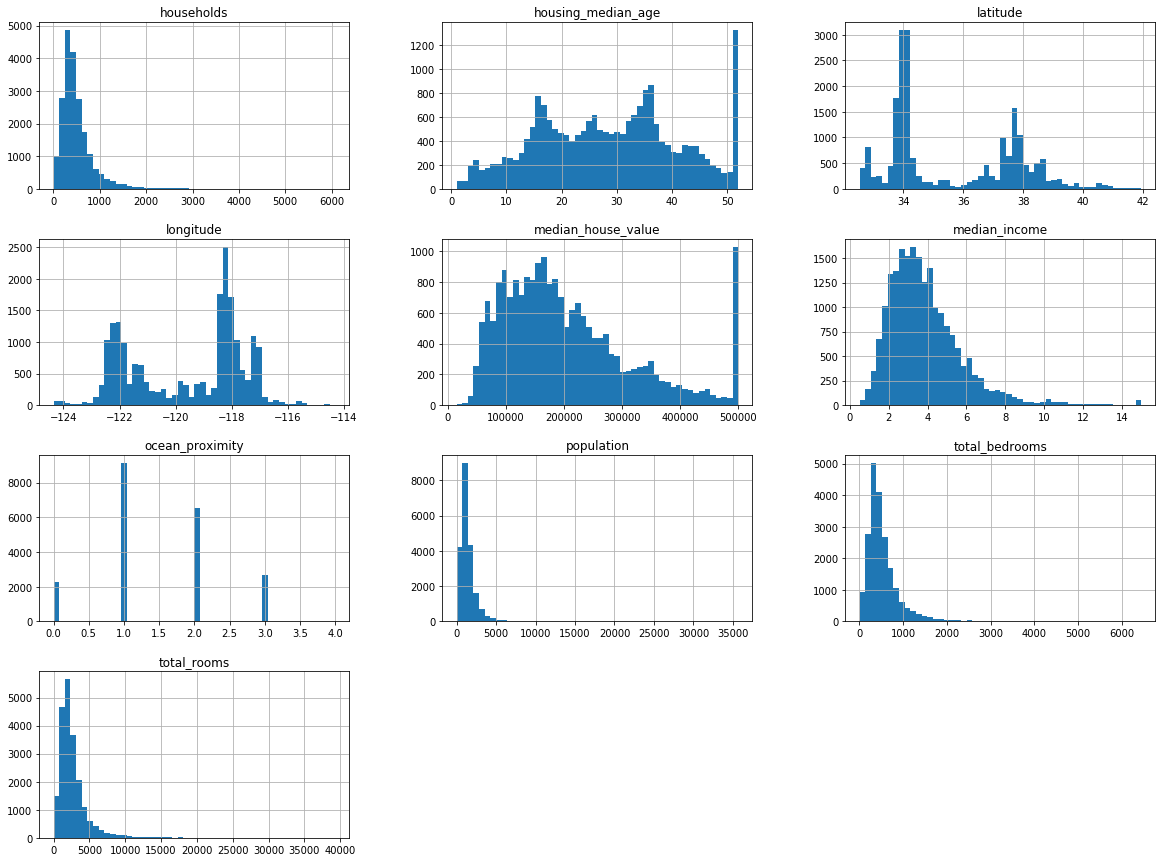

In [54]:
house_data.hist(bins=50, figsize=(20,15))

# From the above depictions, median_income is following normal distribution with right side skew
# Correlation factor may helps us to understand the relationship between the independant features to dependant feature which is target or prediction variable

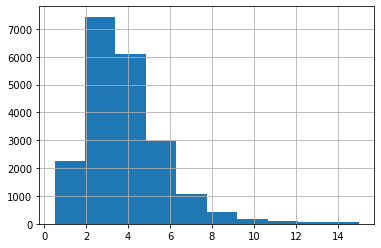

In [55]:
house_data['median_income'].hist()

In [56]:
corr_matrix = house_data.corr()

In [57]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068831,0.099773,0.055310,-0.015176,0.180381,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066147,-0.108785,-0.071035,-0.079809,-0.067586,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318710,-0.296244,-0.302916,-0.119034,-0.204882,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925723,0.857126,0.918484,0.198050,0.014818,0.134153
total_bedrooms,0.068831,-0.066147,-0.318710,0.925723,1.000000,0.871989,0.972731,-0.007511,0.004094,0.049406
population,0.099773,-0.108785,-0.296244,0.857126,0.871989,1.000000,0.907222,0.004834,-0.008511,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972731,0.907222,1.000000,0.013033,-0.016911,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007511,0.004834,0.013033,1.000000,-0.129135,0.688075
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004094,-0.008511,-0.016911,-0.129135,1.000000,-0.210600
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049406,-0.024650,0.065843,0.688075,-0.210600,1.000000


In [58]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049406
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_proximity      -0.210600
Name: median_house_value, dtype: float64

# correlation value is from -1 to +1 , which means -ve values gives less correlated and +ve values gives highly correlated

In [59]:
# by neglecting -ve correlation values, 
# scotter plot helps in to plot between two features
# 6 features with +ve correlation values and gives 36 plots

In [60]:
house_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [61]:
New_features = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "households", "total_bedrooms"]

In [62]:
New_features

['median_house_value',
 'median_income',
 'total_rooms',
 'housing_median_age',
 'households',
 'total_bedrooms']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4A2272D88>,
      dtype=object)

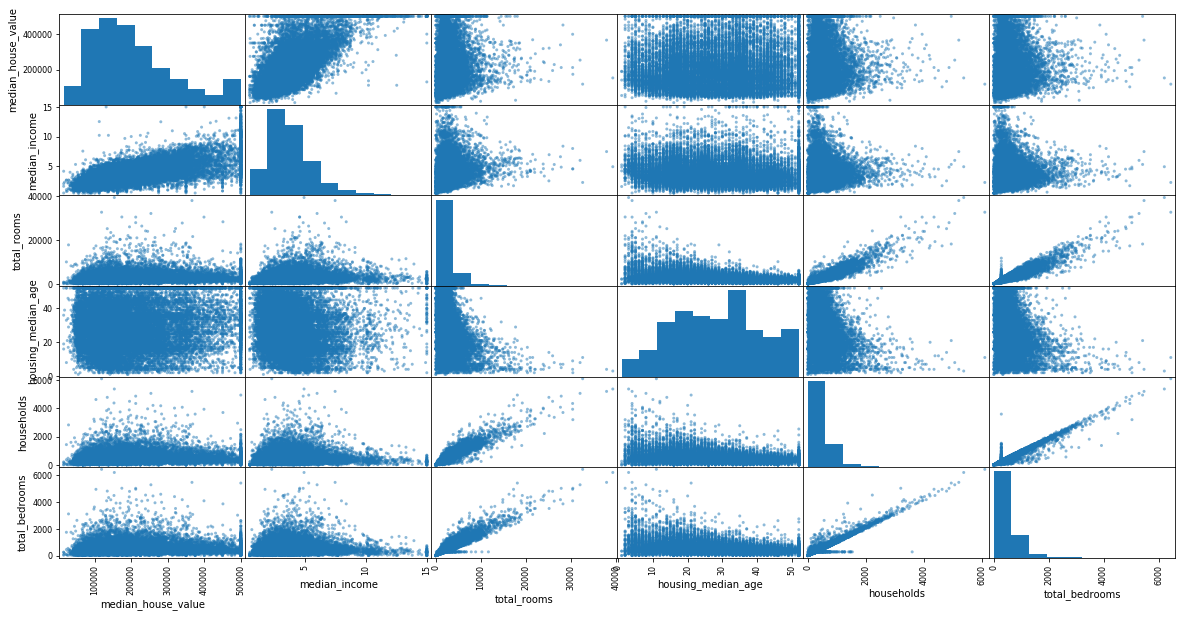

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(house_data[New_features], figsize=(20,10))

# Based on the correlation and scatter plot , median_income and median_value value is having strong relationship.

# PERFORM LINEAR REGRESSION

In [64]:
X=pd.DataFrame(X)

In [65]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603
20636,-121.21,39.49,18,697,150.0,356,114,2.5568
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672


In [66]:
Y = pd.DataFrame(Y)

In [67]:
Y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [68]:
#Perform Linear Regression on training data
from sklearn.linear_model import LinearRegression

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=29)     

<IPython.core.display.Javascript object>

In [70]:
Lin_reg_Model = LinearRegression()

In [71]:
Lin_reg_Model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# Predict output for test dataset using the fitted model
Y_predict = Lin_reg_Model.predict(X_test)

In [73]:
Y_predict

array([[266873.77359769],
       [153516.89020757],
       [164104.99127688],
       ...,
       [270456.57674874],
       [273736.26033255],
       [226030.49071114]])

In [74]:
print(Lin_reg_Model.coef_)

[[-4.27219715e+04 -4.24835362e+04  1.15715049e+03 -7.02410459e+00
   8.38455256e+01 -3.86894154e+01  7.60870545e+01  3.99621831e+04]]


In [75]:
print(Lin_reg_Model.intercept_)

[-3584758.98571378]


In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(Y_test, Y_predict)

0.6360822173249592

# R**2 is the accuracy of the model

In [78]:
# print root mean squared error
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y_test, Y_predict)
mse

4889615306.268457

In [79]:
rmse = np.sqrt(mse) 
rmse

69925.78427353145

# 7. BONUS EXCERCISE

# Perform Linear Regression with one independent vriable.

In [80]:
# Extractjust the median_income column from the independant variables
X_new = house_data.loc[:,['median_income']]

In [81]:
X_new

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [82]:
Y_new = house_data.loc[:,['median_house_value']]

In [83]:
Y_new

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [84]:
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new,Y_new, test_size=0.2, random_state=29) 

<IPython.core.display.Javascript object>

# random_state will helps in stabilize the selection of datasets for evaluation     

In [85]:
Lin_reg_Model = LinearRegression()

In [86]:
Lin_reg_Model.fit(X_new_train,Y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Predict output for test dataset using the fitted model
Y_predict = Lin_reg_Model.predict(X_new_test)

In [88]:
Y_predict

array([[218751.82506182],
       [162680.86673422],
       [192699.6711626 ],
       ...,
       [228676.85530536],
       [297374.70435346],
       [214957.45490521]])

In [89]:
print(Lin_reg_Model.coef_)

[[42019.60306325]]


In [90]:
print(Lin_reg_Model.intercept_)

[44315.84686536]


In [91]:
r2_score(Y_test, Y_predict)

0.4812687048151014

In [92]:
# print root mean squared error

mse= mean_squared_error(Y_test, Y_predict)

In [93]:
print(mse)

6969696457.623804


In [94]:
rmse = np.sqrt(mse) 

In [95]:
print(rmse)

83484.7079268042


# RESULTS

# 1. As the number of independant (input) variables increases, The R Squared (R**2) value increases.
# 2. As the number of independant (input) variables decreases, The R Squared (R**2) value decreases.
# 3. R2 represents the accuracy of the model with featured considered.
# 4. RMSE value is a huge number which gives the information of Linear regression is not minimised the RMSE values, and may not be the suitable algorithm for the given problem for better fitting of the model.
# 5. Other ML algorithm models may help in arrive at better accuracy of the business problem.